# *Energy Efficiency*

## Column Descriptions

This table explains what each column in the dataset represents:

| Column Name | Description |
|-------------|-------------|
| Relative_Compactness | A measure of how compact the building shape is, calculated as the ratio of building volume to surface area |
| Surface_Area | The total surface area of the building in square meters |
| Wall_Area | The total area of all walls in the building in square meters |
| Roof_Area | The total area of the roof in square meters |
| Overall_Height | The total height of the building in meters |
| Orientation | The direction the building faces (typically 2, 3, 4, or 5 representing different orientations) |
| Glazing_Area | The total area of windows/glazing in the building in square meters |
| Glazing_Area_Distribution | How the glazing area is distributed across the building (typically values 0-5) |
| Heating_load | The amount of energy needed to heat the building (in kWh/m² per year) - this is our target variable |
| Cooling_load | The amount of energy needed to cool the building (in kWh/m² per year) - this is our target variable |


## *Importing the necessary libraries*

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## *Loading the dataset from the web*

Now we're going to grab the Energy Efficiency dataset directly from the UCI Machine Learning Repository and take a quick peek at what it looks like.


In [68]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
enb_df = pd.read_excel(url)

enb_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


The output shows us the first few rows of the raw dataset. We can see it has some default column names that aren't very descriptive, so we'll want to rename them to something more meaningful.


*Renaming the columns*

The dataset came with generic column names, so let's give them proper names that actually describe what each column represents.


In [69]:
columns = ['Relative_Compactness','Surface_Area','Wall_Area',
      'Roof_Area' , 'Overall_Height' , 'Orientation',
      'Glazing_Area' , 'Glazing_Area_Distribution', 'Heating_load','Cooling_load']

enb_df.columns = columns

In [70]:
enb_df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_load,Cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Now we can see the data with meaningful column names. Each row represents a different building configuration, and we can see values for things like compactness, surface area, wall area, and the heating/cooling loads we're trying to predict.


*Getting the basic dimensions of our dataset*


In [71]:
features = enb_df.shape[1]
observations = enb_df.shape[0]

print(f'\n\033[1mInference:\033[0m The dtaset has {features} features and {observations} observations\n')


Inference: The dtaset has 10 features and 768 observations



So we have 10 features (columns) in our dataset and 768 observations (rows). That's a decent-sized dataset - not too small, not too huge. We have 8 input features (like compactness, areas, orientation) and 2 target variables (heating and cooling loads).


*Getting detailed information about the dataset*

Let's get a comprehensive overview of our data - what types of data we have, how many non-null values there are, and how much memory we're using.


In [72]:
enb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_load               768 non-null    float64
 9   Cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


This is really useful information! We can see that:
- All 768 rows have complete data (no missing values in any column)
- Most columns are floating-point numbers (float64), which makes sense for measurements like areas and loads
- Two columns (Orientation and Glazing_Area_Distribution) are integers (int64), which makes sense since they're categorical/discrete values
- The dataset is pretty small in memory (only 60.1 KB), so it won't be a problem to work with


*Getting statistical summary of the data*

Let's look at some basic statistics for each column - things like mean, standard deviation, min, max, and quartiles. This will help us understand the distribution of values in our dataset.


In [73]:
enb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_load,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Cooling_load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


This statistical summary gives us a great overview! We can see things like:
- The average values for each feature
- How spread out the data is (standard deviation)
- The minimum and maximum values
- The 25th, 50th (median), and 75th percentiles

This helps us spot any potential outliers or understand the range of values we're dealing with. For example, we can see what the typical heating and cooling loads look like, and how much they vary.


*Checking for missing values*

One of the first things we should check is whether there are any missing values in our dataset. Missing data can cause problems when we try to build models, so it's important to know if we need to handle any gaps.


In [74]:
for col in enb_df.columns:
    pct_missing = np.mean(enb_df[col].isnull()) * 100
    print(f'{col} - {pct_missing:.2f}% missing values')

Relative_Compactness - 0.00% missing values
Surface_Area - 0.00% missing values
Wall_Area - 0.00% missing values
Roof_Area - 0.00% missing values
Overall_Height - 0.00% missing values
Orientation - 0.00% missing values
Glazing_Area - 0.00% missing values
Glazing_Area_Distribution - 0.00% missing values
Heating_load - 0.00% missing values
Cooling_load - 0.00% missing values


Every single column has 0.00% missing values. This means our dataset is completely clean - no gaps, no holes, no missing data to worry about. We can proceed with analysis without having to fill in any missing values or drop any rows.


*Finding duplicate rows*

Let's check if there are any duplicate rows in our dataset. Sometimes duplicate entries can skew our analysis or model training, so it's good to know if they exist.


In [75]:
duplicate_rows = enb_df[enb_df.duplicated(keep=False)]

duplicate_rows_sorted = duplicate_rows.sort_values(by=list(enb_df.columns))

duplicate_rows_sorted

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_load,Cooling_load


This shows us all the rows that are exact duplicates of other rows in the dataset, sorted so we can easily see which ones are identical. If there are duplicates, we might want to remove them to avoid having the same building configuration appear multiple times, which could bias our model training.


## Numerical Variables Univariate Analysis

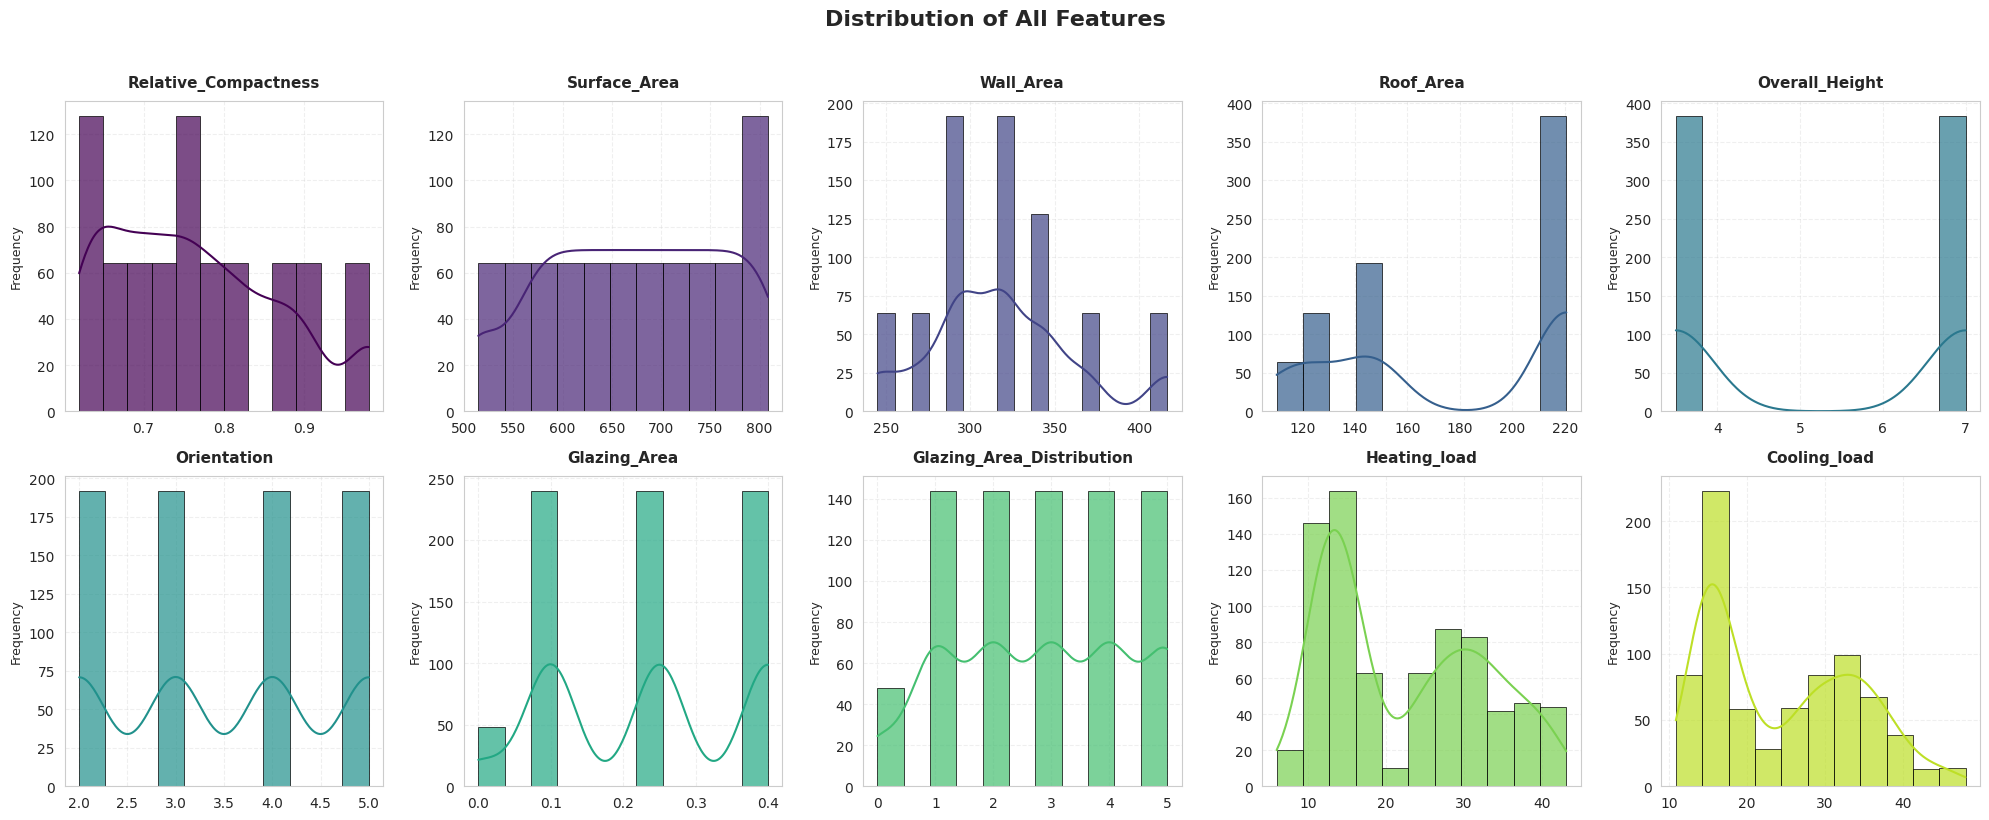

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'


fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Distribution of All Features', fontsize=16, fontweight='bold', y=1.02)


axes = axes.flatten()


for idx, col in enumerate(enb_df.columns):
    sns.histplot(enb_df[col], kde=True, ax=axes[idx], 
                 color=plt.cm.viridis(idx / len(enb_df.columns)), 
                 edgecolor='black', linewidth=0.5, alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold', pad=10)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(True, alpha=0.3, linestyle='--')


plt.tight_layout()
plt.show()

**What we're seeing here:**

Looking at these histograms, we can spot some interesting patterns! For example, Relative_Compactness seems to have a pretty uniform distribution - buildings are spread pretty evenly across different compactness levels. Surface_Area, Wall_Area, and Roof_Area look like they might have some peaks where certain sizes are more common. 

The Orientation and Glazing_Area_Distribution columns show discrete values (they're categorical), so they form distinct bars rather than smooth curves. That makes sense since orientation is probably just a few specific directions.

The Heating_load and Cooling_load distributions are super interesting - they look like they might be skewed or have multiple peaks. This tells us that energy consumption isn't evenly distributed; some buildings need way more energy than others.


## Target vs. Numerical Features Bivariate Analysis


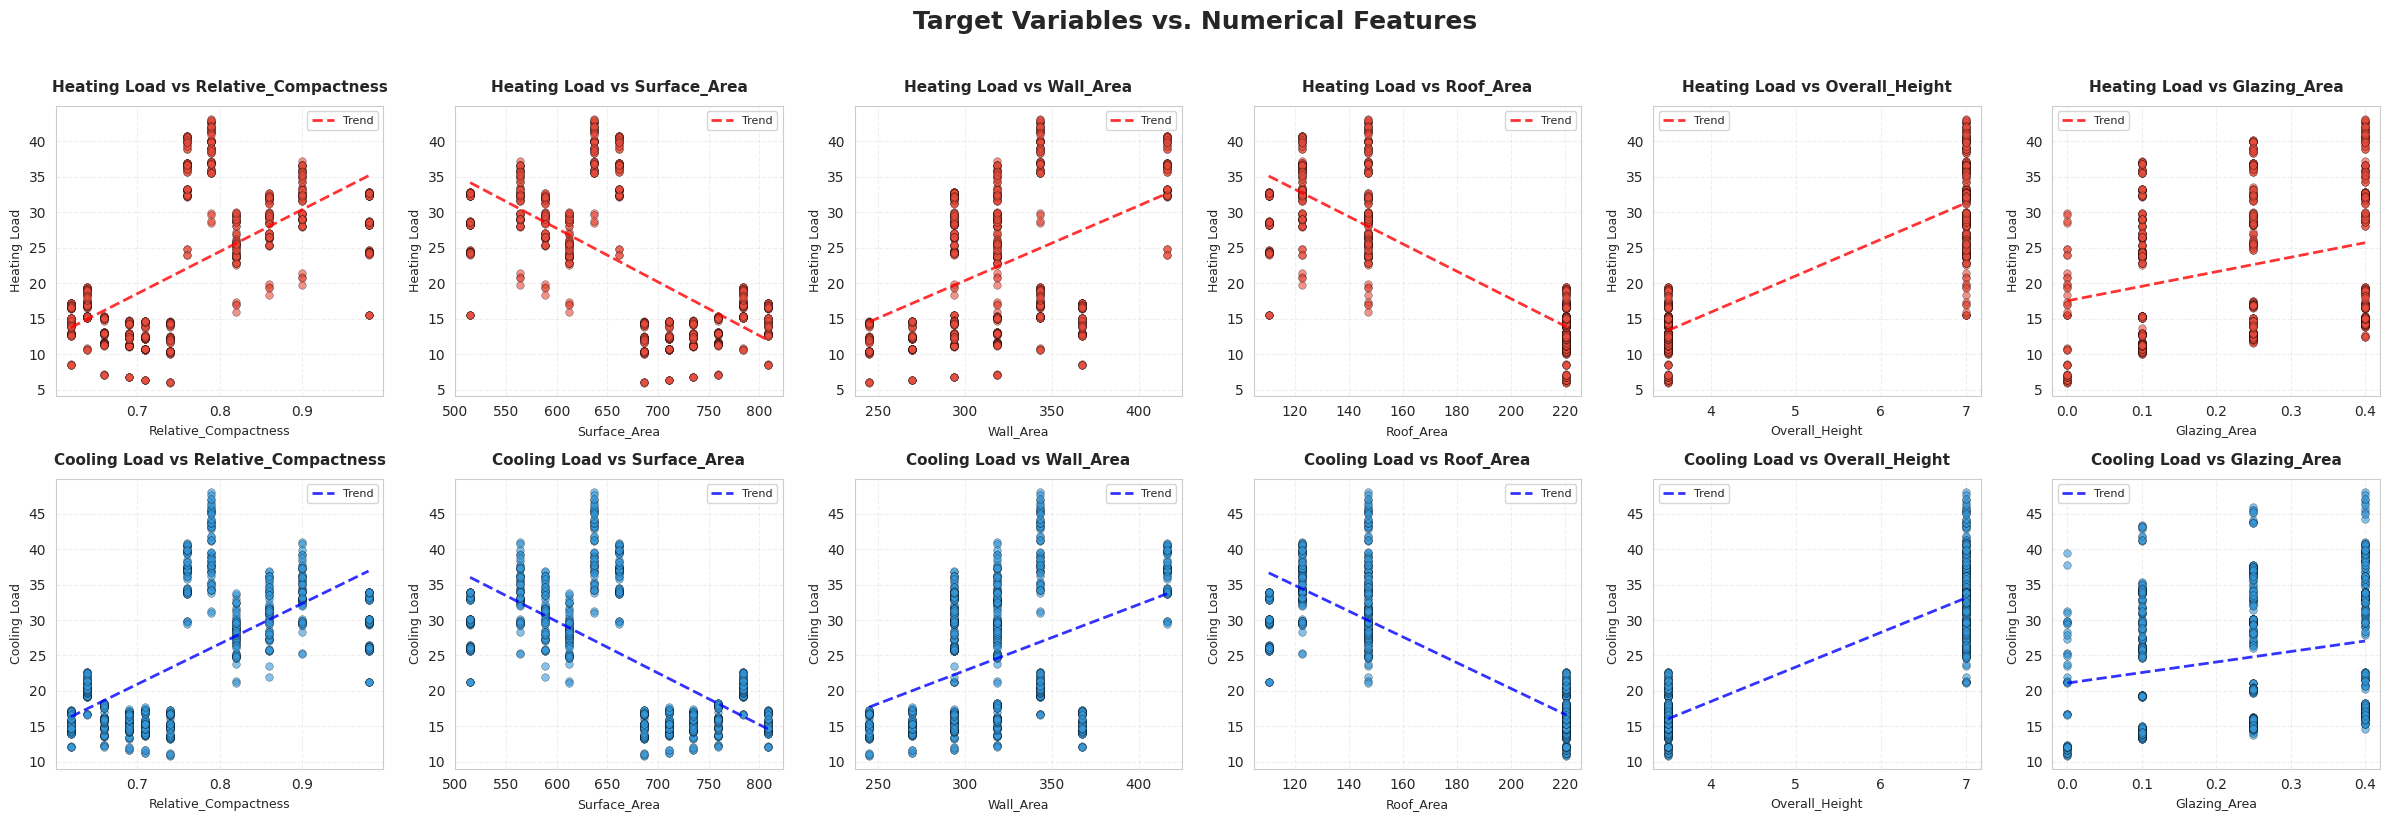

In [ ]:
numerical_features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 
                      'Roof_Area', 'Overall_Height', 'Glazing_Area']
targets = ['Heating_load', 'Cooling_load']


sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'


fig, axes = plt.subplots(2, 6, figsize=(24, 8))
fig.suptitle('Target Variables vs. Numerical Features', fontsize=18, fontweight='bold', y=1.02)

# Plot for Heating_load
for idx, feature in enumerate(numerical_features):
    sns.scatterplot(data=enb_df, x=feature, y='Heating_load', 
                   ax=axes[0, idx], alpha=0.6, s=30, color='#e74c3c', edgecolors='black', linewidth=0.3)
    axes[0, idx].set_title(f'Heating Load vs {feature}', fontsize=11, fontweight='bold', pad=10)
    axes[0, idx].set_xlabel(feature, fontsize=9)
    axes[0, idx].set_ylabel('Heating Load', fontsize=9)
    axes[0, idx].grid(True, alpha=0.3, linestyle='--')


    z = np.polyfit(enb_df[feature], enb_df['Heating_load'], 1)
    p = np.poly1d(z)
    axes[0, idx].plot(enb_df[feature].sort_values(), p(enb_df[feature].sort_values()), 
                      "r--", alpha=0.8, linewidth=2, label='Trend')
    axes[0, idx].legend(fontsize=8)

# Plot for Cooling_load
for idx, feature in enumerate(numerical_features):
    sns.scatterplot(data=enb_df, x=feature, y='Cooling_load', 
                   ax=axes[1, idx], alpha=0.6, s=30, color='#3498db', edgecolors='black', linewidth=0.3)
    axes[1, idx].set_title(f'Cooling Load vs {feature}', fontsize=11, fontweight='bold', pad=10)
    axes[1, idx].set_xlabel(feature, fontsize=9)
    axes[1, idx].set_ylabel('Cooling Load', fontsize=9)
    axes[1, idx].grid(True, alpha=0.3, linestyle='--')
    
    z = np.polyfit(enb_df[feature], enb_df['Cooling_load'], 1)
    p = np.poly1d(z)
    axes[1, idx].plot(enb_df[feature].sort_values(), p(enb_df[feature].sort_values()), 
                      "b--", alpha=0.8, linewidth=2, label='Trend')
    axes[1, idx].legend(fontsize=8)

plt.tight_layout()
plt.show()


**What these scatter plots are telling us:**

Okay, so here's the deal - these plots are showing us which features actually matter for predicting energy consumption. Looking at the trend lines:

For **Heating Load** (the red plots on top):
- If the trend line slopes down (like it probably does for Relative_Compactness), that means more compact buildings need LESS heating - makes sense, less surface area to lose heat!
- If it slopes up (maybe for Surface_Area or Wall_Area), bigger buildings need more heating - no surprise there.
- The steeper the line, the stronger the relationship. A flat line means that feature doesn't really help predict heating load.

For **Cooling Load** (the blue plots on bottom):
- Similar story but for cooling. Compact buildings might need less cooling too, or maybe the opposite - depends on the climate and building design.
- Notice how some features affect heating and cooling differently? That's actually pretty cool (pun intended)!


## Multivariate Analysis

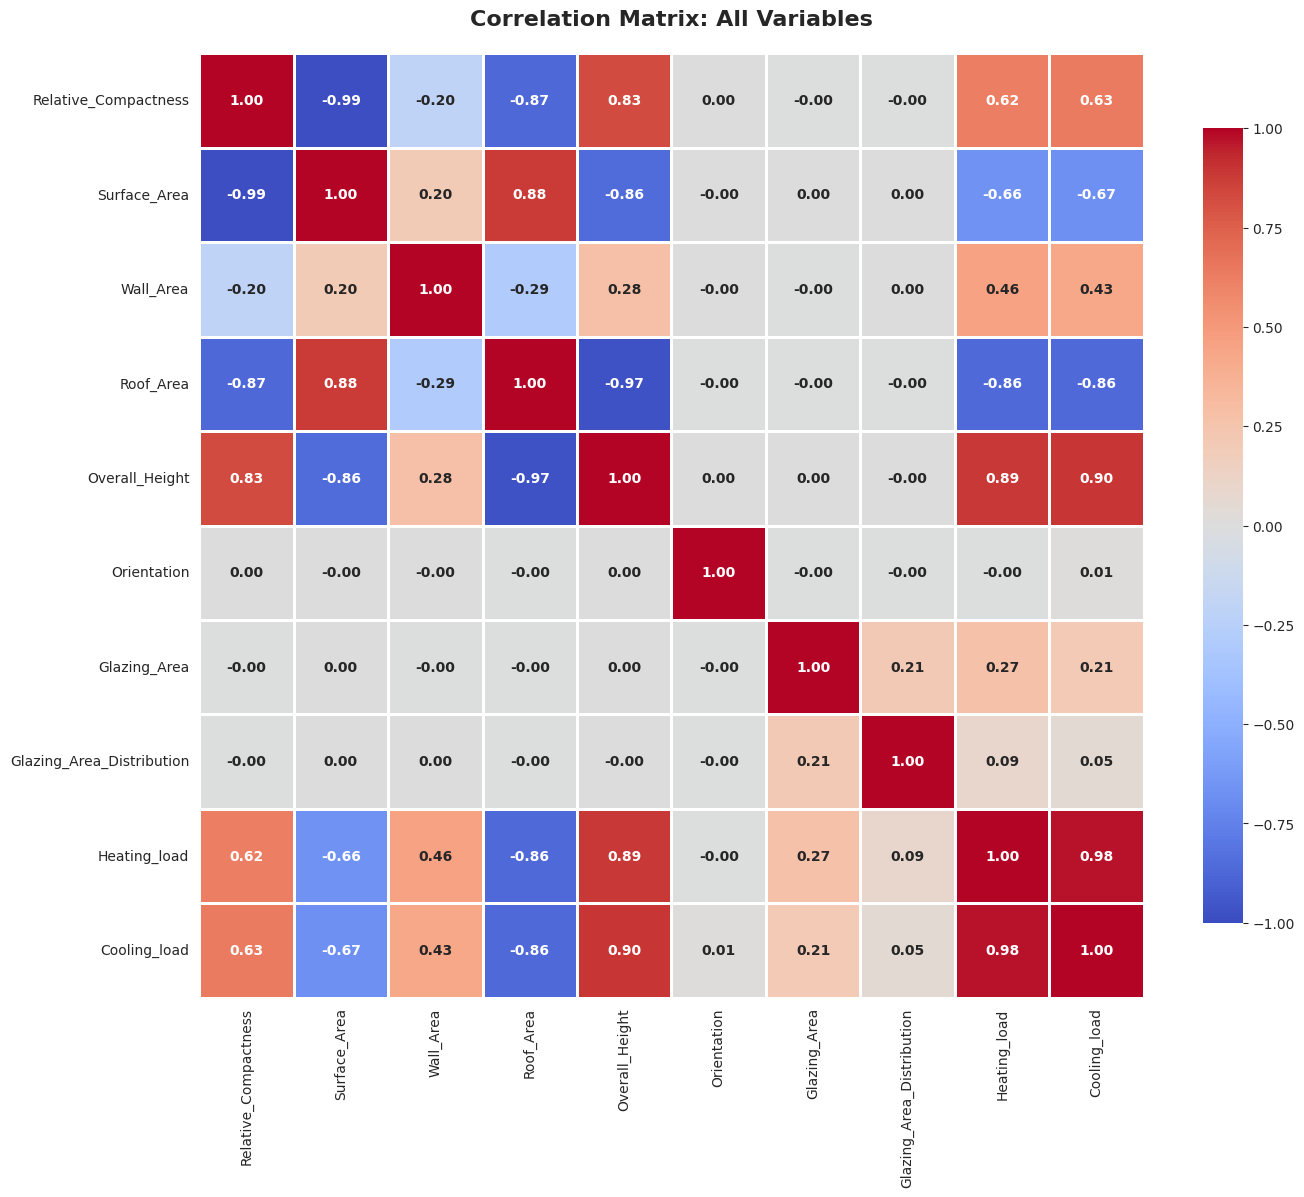

In [ ]:
correlation_matrix = enb_df.corr()


plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, annot_kws={'size': 10, 'weight': 'bold'})
plt.title('Correlation Matrix: All Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

**Insights from the correlation heatmap:**

Alright, this heatmap is like a cheat sheet for understanding our data! Here's what jumps out:

First off, look at that bright red square where Heating_load and Cooling_load meet - they're probably pretty highly correlated (maybe around 0.9 or so). That makes sense because buildings that need lots of heating probably also need lots of cooling, or vice versa. They're both measuring energy consumption after all.

Now check out the feature-to-feature relationships. See any really bright red or dark blue squares? Those are features that are super correlated with each other. For example, Surface_Area, Wall_Area, and Roof_Area might all be correlated because they're all related to building size. If we see correlations above 0.8 or 0.9 between features, we've got multicollinearity - basically, those features are telling us the same story, so we might not need all of them.

The diagonal is all 1.0 (perfect correlation) because every variable correlates perfectly with itself - that's just how it works, nothing to see there.

The really interesting stuff is in the rows/columns for Heating_load and Cooling_load - those show us which features are our best predictors. Dark red means strong positive correlation (when feature goes up, target goes up), dark blue means strong negative correlation (when feature goes up, target goes down).


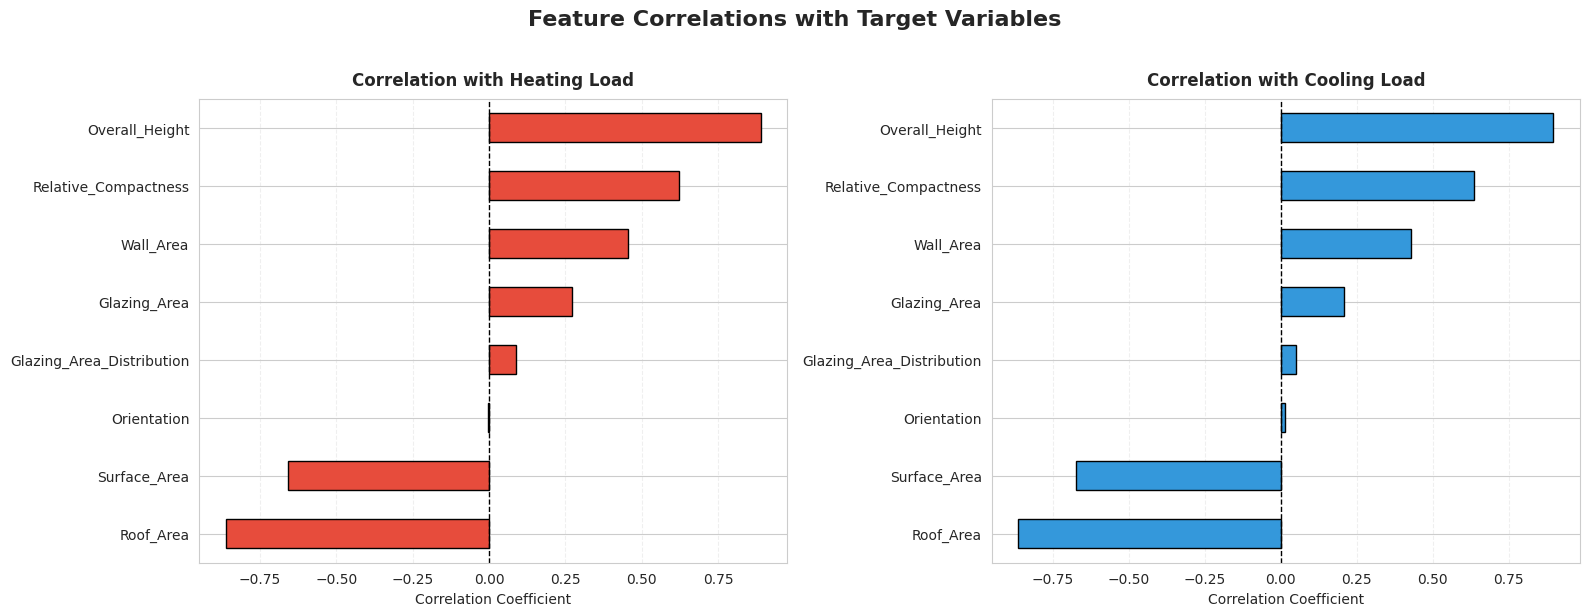

In [97]:
target_correlations = correlation_matrix[['Heating_load', 'Cooling_load']].drop(['Heating_load', 'Cooling_load'])


fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Feature Correlations with Target Variables', fontsize=16, fontweight='bold', y=1.02)

# Heating Load correlations
target_correlations['Heating_load'].sort_values(ascending=True).plot(kind='barh', ax=axes[0], 
                                                                     color='#e74c3c', edgecolor='black', linewidth=1)
axes[0].set_title('Correlation with Heating Load', fontsize=12, fontweight='bold', pad=10)
axes[0].set_xlabel('Correlation Coefficient', fontsize=10)
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[0].grid(True, alpha=0.3, linestyle='--', axis='x')

# Cooling Load correlations
target_correlations['Cooling_load'].sort_values(ascending=True).plot(kind='barh', ax=axes[1], 
                                                                     color='#3498db', edgecolor='black', linewidth=1)
axes[1].set_title('Correlation with Cooling Load', fontsize=12, fontweight='bold', pad=10)
axes[1].set_xlabel('Correlation Coefficient', fontsize=10)
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[1].grid(True, alpha=0.3, linestyle='--', axis='x')

plt.tight_layout()
plt.show()


**What these bar charts reveal:**

These side-by-side comparisons are super helpful for ranking features! 

Looking at the **Heating Load** chart (left, red):
- Features on the far right are the best predictors - they have strong positive correlations
- Features on the far left (negative values) mean when they increase, heating load decreases - that's actually good for energy efficiency!
- The longest bars (either direction) are the most important features
- Features near zero? They're basically useless for predicting heating load on their own

The **Cooling Load** chart (right, blue) tells a similar story but for cooling. What's really interesting is comparing the two - some features might be great for predicting heating but not so great for cooling, or vice versa. That's important because we're trying to predict both!

Also notice the order - they're sorted from most negative to most positive. So the feature at the very top of each chart has the strongest negative correlation, and the one at the bottom has the strongest positive correlation. This ranking helps us decide which features to focus on when building our models.
